In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
dados_brutos=pd.read_csv('restaurantes.csv')
dados_brutos

,Nome,Estrelas,Avaliações,Cozinha,Preço,Segurança,Reviews
0,Coco Bambu Conceito Pátio Paulista,5.0,109,Frutos do mar,2.5,0,"['“Almoço”', '“Aniversário dos meus gêmeos ♡”']"
1,Coco Bambu Conceito Vila Olímpia,5.0,563,"Brasileira, Frutos do mar",2.5,1,"['“Atendimento Kaio Marquês”', '“Atendimento K..."
2,HUB Food Art & Lounge,5.0,1021,"Brasileira, Internacional",4.0,1,"['“Aniversário de casamento”', '“Comida impecá..."
3,Picanharia Dos Amigos,5.0,1003,"Steakhouse, Brasileira",2.5,1,"['“Sensacional”', '“Picanharia dos Amigos - Ma..."
4,Coco Bambu Market Place,4.5,4961,"Brasileira, Bar",2.5,1,"['“Avaliação Matheus”', '“Jantar”']"
...,...,...,...,...,...,...,...
265,Museo Veronica,4.5,405,"Mediterrânea, Europeia",2.5,0,"['“Ótimo custo benefício!”', '“O garçom esquec..."
266,Windhuk,4.5,394,"Alemã, Europeia",2.5,0,"['“Comida alemã”', '“Local pitoresco e agradáv..."
267,La Frontera,4.5,261,Argentina,2.5,0,"['“Pedido pelo Ifood que Não CHEGOU”', '“Não h..."
268,Almanara,4.5,373,"Libanesa, Oriente Médio",2.5,0,"['“Opção de rodízio”', '“Delivery prato errado”']"


## Introdução à base de dados

Após a obtenção dos dados dos melhores restaurantes (de acordo com as estrelas dadas nas avaliações) extraídos do site da tripadvisor, um data frame foi formado. Na primeira coluna há o nome dos restaurantes, importante para entender qual restaurante possui quais dados, o que é importante para ser possível colocar no relatório por exemplo qual é o outlier.

Em seguida há a coluna Estrelas. A informação contida lá é a quantidade média de estrelas, arredondada a cada 0,5, que as pessoas dão nas avaliações do restaurante, quanto mais estrelas melhor. Por os dados terem sido extraídos dos melhores restaurantes, só há 5 e 4,5 na coluna, visto que são as 2 maiores notas possíveis, já que as estrelas de cada restaurante podem variar de 0 a 5.

A coluna avaliações traz o número de avaliações que cada restaurante recebeu e tal informação é muitíssimo relacionada a quantidade de clientes que foram e usam o tripadvisor, não atoa restaurantes mais famosos e com muitas franquias como o "Coco Bambu" possuem uma quantidade elevadas de avaliações.

Na coluna Cozinha está o tipo de culinária que cada restaurante oferece em seus cardápios, tal informação está disponível do site e é importantíssima para guiar as pesquisas do consumidor, que muitas vezes pesquisam de acordo com essa categoria.

Já na coluna preços está um dado que diz o quão caro é o restaurante. Interpretar tal dado é simples, assim como as estrelas a informação preço varia de 0 a 4, de 0,5 em 0,5. No site ela está dada como uns símbolos de cifrões. Ou seja, quanto maior o número, mais caro é o restaurante.

O dado segurança diz se por conta da pandemia o restaurante possui medidas de segurança ou não. No caso o número 1 significa que o restaurante possui tais medidas e 0, que não possuem.

Por fim, "Reviews" traz o titulo dos dois primeiros comentários que os usuários fazem sobre o restaurante.

In [4]:
cozinha=dados_brutos['Cozinha']
todas=[]
cozinhas=[]
for i in cozinha:
    e=i.split(',')
    if len(e)>1:
        e[1]=e[1][1:]
    for c in e:
        
        todas.append(c)
for c in todas:
    if c not in cozinhas:
        cozinhas.append(c)
cozinhas

['Frutos do mar',
 'Brasileira',
 'Internacional',
 'Steakhouse',
 'Bar',
 'Japonesa',
 'Peruana',
 'Mexicana',
 'Latina',
 'Asiática',
 'Vietnamita',
 'Havaiana',
 'Italiana',
 'Pizza',
 'Contemporânea',
 'Culinária de fusão japonesa',
 'Churrasco',
 'Mediterrânea',
 'Sul-americana',
 'Americana',
 'Fast food',
 'Lanchonete',
 'Francesa',
 'Portuguesa',
 'Wine Bar',
 'Saudável',
 'Europeia',
 'Grelhados',
 'Sushi',
 'Indiana',
 'Café',
 'Coreana',
 'Chinesa',
 'Libanesa',
 'Oriente Médio',
 'Argentina',
 'Fusion',
 'Pub com cerveja artesanal',
 'Malaia',
 'Alemã',
 'Turca',
 'Árabe',
 'Israelense']

In [6]:
dic_dummies={}
for tipo_cozinha in cozinhas:
    dic_dummies[tipo_cozinha]=[]
for coz_bruto in dados_brutos["Cozinha"]:
    for tipo_cozinha in cozinhas:
        if tipo_cozinha in coz_bruto:
            dic_dummies[tipo_cozinha].append(1)
        else:
            dic_dummies[tipo_cozinha].append(0)

In [34]:
df=dados_brutos.copy()
df.drop('Cozinha',inplace=True,axis=1)

In [35]:
for c,coluna in dic_dummies.items():
    df[c]=coluna
df

,Nome,Estrelas,Avaliações,Preço,Segurança,Reviews,Frutos do mar,Brasileira,Internacional,Steakhouse,...,Libanesa,Oriente Médio,Argentina,Fusion,Pub com cerveja artesanal,Malaia,Alemã,Turca,Árabe,Israelense
0,Coco Bambu Conceito Pátio Paulista,5.0,109,2.5,0,"['“Almoço”', '“Aniversário dos meus gêmeos ♡”']",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coco Bambu Conceito Vila Olímpia,5.0,563,2.5,1,"['“Atendimento Kaio Marquês”', '“Atendimento K...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HUB Food Art & Lounge,5.0,1021,4.0,1,"['“Aniversário de casamento”', '“Comida impecá...",0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Picanharia Dos Amigos,5.0,1003,2.5,1,"['“Sensacional”', '“Picanharia dos Amigos - Ma...",0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Coco Bambu Market Place,4.5,4961,2.5,1,"['“Avaliação Matheus”', '“Jantar”']",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Museo Veronica,4.5,405,2.5,0,"['“Ótimo custo benefício!”', '“O garçom esquec...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,Windhuk,4.5,394,2.5,0,"['“Comida alemã”', '“Local pitoresco e agradáv...",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
267,La Frontera,4.5,261,2.5,0,"['“Pedido pelo Ifood que Não CHEGOU”', '“Não h...",0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
268,Almanara,4.5,373,2.5,0,"['“Opção de rodízio”', '“Delivery prato errado”']",0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


Antes do início da análise dos dados, um último tratamento foi neccessário para que, posteriormente, a análise fosse facilitada. No site do tripAdvisor, cada restaurante possui um ou dois tipos de culinária e, por isso, a estratégia ideal para que depois fosse feita uma análise de cada tipo foi criar uma coluna para cada estilo de cozinha.

## Análise Exploratória

### Análise Inicial

In [36]:
df['Estrelas'].value_counts()

4.5    234
5.0     36
Name: Estrelas, dtype: int64

In [37]:
df['Estrelas'].value_counts(normalize=True)*100

4.5    86.666667
5.0    13.333333
Name: Estrelas, dtype: float64

Com 86.67% porcento dos dados, fica claro que a maior parte dos restaurantes têm 4.5 estrelas e 13.32% obtiveram avaliações de 5 estrelas. Sabendo que retiramos os dados dos 270 melhores restaurantes do tripAdvisor, era esperado que as avaliações fossem postivas. Dessa forma, mesmo que 4.5 seja uma nota boa, é plausível tratar os restaurantes de 5 estrelas de forma diferente nesse estudo de dados.

In [38]:
df.groupby(by='Estrelas')['Avaliações'].mean()

Estrelas
4.5     914.149573
5.0    1019.611111
Name: Avaliações, dtype: float64

Com o objetivo de não interpretar errado os dados, fizemos um estudo da quantidade de avaliações para cada categoria de estrelas. Desconhecendo o algoritmo que ranqueia os restaurantes no site, seria possível que um restaurante tivesse, por exemplo, apenas uma avaliação com 5 estrelas e, por isso, fosse ranqueado entre os 13.32% melhores restaurantes de São Paulo. Para ter certeza de que os restaurantes que receberam 5 estrelas realmente possuem um número considerado de pessoas que o visitaram e julgaram, bastou analisar a média de avaliações. Com média maior que os de 4.5, os restaurantes com 5 estrelas possuem um valor adequado de avaliações para serem analisados.

### Qual a relação do preço da comida com a quantidade de estrelas?

In [39]:
pd.crosstab(df['Preço'],df['Estrelas'],normalize='index')*100

Estrelas,4.5,5.0
Preço,,
1.0,66.666667,33.333333
2.5,85.263158,14.736842
4.0,94.117647,5.882353


A tabela acima representa a porcentagem de restaurantes dado determinado preço. Ou seja, se o preço é 4.0, 94.12% dos restaurantes são de 4.5 estrelas. Dessa forma, ficou claro uma tendência curiosa: quanto mais caro os restaurantes, menores as estrelas dadas. Não é possível afirmar que, por ser mais caro, o restaurante é pior, mas, pelos resultados das 270 amostras do projeto, esse fonômeno acontece. Após esses resultados, foi formulada a hipótese de que talvez a quantidade de amostras de preço 1 interfiram no resultado com maior quantidade de restaurantes de 5 estrelas.

In [29]:
print('Restaurantes com preço 1: {}.'.format(len(df.loc[df['Preço']==1])))
print('Restaurantes com preço 2.5: {}.'.format(len(df.loc[df['Preço']==2.5])))
print('Restaurantes com preço 4.0: {}.'.format(len(df.loc[df['Preço']==4.0])))

Restaurantes com preço 1: 12.
Restaurantes com preço 2.5: 190.
Restaurantes com preço 4.0: 68.


Realmente, apenas 4.43% dos restaurantes têm preço 1. No entanto, os restaurantes mais caros representam aproximadamente um quarto da amostra e, portanto, suas informações são valiosas. Apenas 5.88% dos restaurantes de preço 4 são considerados pelo site como de 5 estrelas.

### Qual o tipo de cozinha com a maior quantidade de estrelas? E o com a menor?

Primeiramente, é necessário estabelecer uma unidade de medida plausível para o estudo das estrelas por restaurante. Se fosse apenas uma soma, seria simplesmente uma valorização dos tipos de cozinha com maior quantidade de restaurantes. Dessa forma, para não beneficiar aqueles com mais restaurantes, basta analisar a média de estrelas.

In [12]:
cozinha_estrela={}
qntd=[]
i=0
for c in cozinhas:
    df1=df.loc[df[c]==1,'Estrelas']
    if len(df1)>=5:
        qntd.append(len(df1))
        cozinha_estrela[c]=df1.mean()



In [13]:
cp=pd.DataFrame(cozinha_estrela, index=['Estrelas']).T
cp['Quantidade']=qntd
cp.sort_values(by='Estrelas',ascending=False)

,Estrelas,Quantidade
Frutos do mar,4.636364,33
Internacional,4.625000,12
Lanchonete,4.625000,8
Americana,4.607143,14
Steakhouse,4.602941,34
Contemporânea,4.600000,10
Grelhados,4.600000,5
Brasileira,4.590361,83
Bar,4.560000,25
Churrasco,4.555556,9


É possível perceber na tabela acima que nem todos os tipos de cozinha estão listados. Isso porque, numa tabela inicial, o tipo de cozinha com maior quantidade de estrelas eram a Havaiana e a Culinária de fusão japonesa, que tinham apenas um restaurante com 5 estrelas. De certa forma, seria incoerente considerá-los como as cozinhas com maior quantidade de estrelas pela falta de dados. Para contornar esse problema, adicionamos à tabela apenas os tipos de cozinha com 5 ou mais restaurantes listados. Dessa forma, é possível analisar as cozinhas com determinada expressão.

In [32]:
df.loc[df['Havaiana']==1,'Estrelas']

15    5.0
Name: Estrelas, dtype: float64

In [33]:
df.loc[df['Culinária de fusão japonesa']==1,'Estrelas']

22    5.0
Name: Estrelas, dtype: float64

Por fim, analisando a média e retirando cozinhas com poucos restaurantes, os Frutos do Mar se provaram uma culinária popular no Estado de São Paulo. Como 86.67% dos restaurantes possuem nota de 4.5, é surpreendente que uma cozinha com 33 restaurantes tenha a maior média, já que a tendência numa situação dessa seria que, com muitos restaurantes, mais próximo ao 4.5 a média seria. 

Além disso, das 8 culinárias que não têm um restaurante com 5 estrelas, 7 representam cozinhas internacionais (sul-americana, asiática, francesa, europeia, sushi, libanesa, Oriente Médio). Mesmo que as diferentes culinárias envolvam, em sua maioria, comida de outros lugares, é curioso que todos os estilos com identidade nacional tenham, ao menos, um restaurante com 5 estrelas. Nesse caso, a oitava cozinha com média de 4.5 é a saudável, também em função de um possível preconceito dos brasileiros à comida vegetariana, vegana ou com pratos equilibrados. 

### Considerando que, quanto maior o número de avaliações, maior o público do restaurante, como os restaurantes que recebem mais gente estão lidando com a segurança para a Covid?

In [90]:
df.groupby(by='Segurança')['Avaliações'].mean()

Segurança
0     766.734884
1    1559.436364
Name: Avaliações, dtype: float64

A média de avaliações para restaurantes com medidas de segurança ao corona é maior. Dessa forma, é possível concluir que os restaurantes com o maior público são aqueles que estão se prevenindo.

### Qual a média de preço para cada tipo de cozinha com ou sem segurança? 

Essa pergunta busca, além de estudar o preço de cada culinária, analisar a acessibilidade de restaurantes com medidas de segurança, ou se o preço tende a ser mais alto.

In [46]:
cozinha_preco={}
medias_sem=[]
medias_com=[]
maior=[]
i=0
for c in cozinhas:
    df1=df.loc[df[c]==1,['Preço','Segurança']]
    
    df2=df1.loc[df1['Segurança']==0,'Preço']
    medias_sem.append(df2.mean())
    
    df3=df1.loc[df1['Segurança']==1,'Preço']
    medias_com.append(df3.mean())
    
    if df2.mean()>df3.mean():
        maior.append('Sem seg')
    elif df2.mean()<df3.mean():
        maior.append('Com seg')
    elif df2.mean()==df3.mean():
        maior.append('Iguais')
    else:
        maior.append('--')


In [47]:
df4=pd.DataFrame({'Restaurantes':cozinhas,
                  'Preço com seg':medias_com,
                  'Preço sem seg':medias_sem,
                  'Maior preço':maior})
df4

,Restaurantes,Preço com seg,Preço sem seg,Maior preço
0,Frutos do mar,2.666667,2.875000,Sem seg
1,Brasileira,2.812500,2.855932,Sem seg
2,Internacional,3.500000,3.333333,Com seg
3,Steakhouse,2.800000,3.437500,Sem seg
4,Bar,2.500000,2.500000,Iguais
5,Japonesa,2.125000,2.810345,Sem seg
6,Peruana,2.500000,2.500000,Iguais
7,Mexicana,1.750000,NaN,--
8,Latina,2.125000,3.250000,Sem seg
9,Asiática,2.500000,2.333333,Com seg


In [52]:
dic={'Com seg':len(df4.loc[df4['Maior preço']=='Com seg']),'Sem seg':len(df4.loc[df4['Maior preço']=='Sem seg']),'Iguais':len(df4.loc[df4['Maior preço']=='Iguais'])}

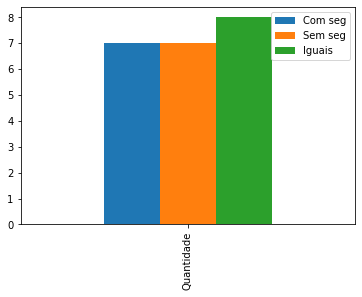

In [55]:
pd.DataFrame(dic, index=['Quantidade']).plot(kind='bar')

Pelo gráfico acima, fica claro a segurança para corona em restaurantes não tem impacto visível nos preços, já que não existe uma tendencia muito evidente. Como existem muitos tipos de culinária que possuem apenas restaurantes com ou apenas sem segurança, talvez uma análise com um banco de dados maior traria uma resposta mais aproximada e uma tendência não observada. No entanto, com os restaurantes aqui ananlisados, ter ou não ter medidas preventivas para o corona não influência no quão caro o restaurante é.

### Qual a média de preço para cada tipo de cozinha com ou sem segurança? 

Nesse caso, a pergunta é muita semelhante, mas desta vez o objeto de estudo é a média de estrelas com ou sem segurança para covid.

In [56]:
cozinha_preco_seg={}
medias_sem=[]
medias_com=[]
maior=[]
i=0
for c in cozinhas:
    df1=df.loc[df[c]==1,['Estrelas','Segurança']]
    
    df2=df1.loc[df1['Segurança']==0,'Estrelas']
    medias_sem.append(df2.mean())
    
    df3=df1.loc[df1['Segurança']==1,'Estrelas']
    medias_com.append(df3.mean())
    
    if df2.mean()>df3.mean():
        maior.append('Sem seg')
    elif df2.mean()<df3.mean():
        maior.append('Com seg')
    elif df2.mean()==df3.mean():
        maior.append('Iguais')
    else:
        maior.append('--')
df5=pd.DataFrame({'Restaurantes':cozinhas,
                  'Estrelas com seg':medias_com,
                  'Estrelas sem seg':medias_sem,
                  'Mais estrelas':maior})
df5

,Restaurantes,Estrelas com seg,Estrelas sem seg,Mais estrelas
0,Frutos do mar,4.722222,4.604167,Com seg
1,Brasileira,4.791667,4.508475,Com seg
2,Internacional,5.000000,4.500000,Com seg
3,Steakhouse,4.800000,4.520833,Com seg
4,Bar,4.666667,4.526316,Com seg
5,Japonesa,4.625000,4.534483,Com seg
6,Peruana,5.000000,4.500000,Com seg
7,Mexicana,4.625000,NaN,--
8,Latina,4.625000,4.500000,Com seg
9,Asiática,4.500000,4.500000,Iguais


In [57]:
dic2={'Com seg':len(df5.loc[df5['Mais estrelas']=='Com seg']),'Sem seg':len(df5.loc[df5['Mais estrelas']=='Sem seg']),'Iguais':len(df5.loc[df5['Mais estrelas']=='Iguais'])}

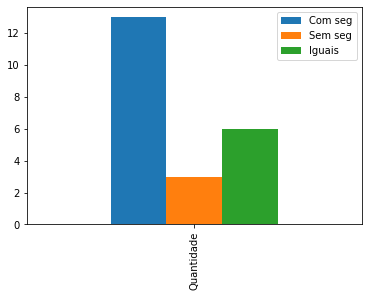

In [58]:
pd.DataFrame(dic2, index=['Quantidade']).plot(kind='bar')

Diferente do último gráfico, parece que existe uma correlação positiva entre uma avaliação melhor e culinárias com segurança, algo totalmente esperado já que, após mais de um ano de pandemia, é razoável que os clientes dessem 5 estrelas para restaurantes que buscam a segurança de sua clientela. Além disso, restaurantes que não têm medidas de prevenção à doença tendem a receber avaliações negativas e a baixar sua média de estrelas.

### Como se dá o fluxo de pessoas em diferentes culinárias em São Paulo?

Utilizando o paralelo de que a quantidade de avaliações é diretamete proporcional com o público que frequenta cada tipo de restaurante, há duas maneiras de avaliar o fluxo de pessoas. O primeiro, mais direto, é simplesmente somar o número de avaliações. Essa soma representa o fluxo absoluto de pessoas, ou seja, as culinárias com mais restaurantes tendem a ter um número maior. Não há nada de errado nisso, já que essa informação irá representar qual culinária é mais visitada em São Paulo. No entanto, é possível também analisar a média de avaliações e, dessa forma, considerar o fluxo de pessoas por restaurante. Dessa forma, mesmo que haja uma menor quantidade de instalações daquela culinária de São Paulo, se houver muitas pessoas nessas poucas unidades o valor será considerado. Em suma, tanto o número absoluto de pessoas como a média têm informações úteis.

In [75]:
soma=[]
media=[]
qntde2=[]
for c in cozinhas:
    df1=df.loc[df[c]==1,['Avaliações']]
    qntde2.append(len(df1))
    media.append(df1['Avaliações'].mean())
    soma.append(df1['Avaliações'].sum())

In [87]:
df6=pd.DataFrame({'Restaurantes':cozinhas,
                  'Soma das avaliações':soma,
                  'Médias das Avaliações':media,
                  'Quantidade':qntde2})
df6.sort_values(by='Soma das avaliações',ascending=False).head(10)

,Restaurantes,Soma das avaliações,Médias das Avaliações,Quantidade
1,Brasileira,112602,1356.650602,83
12,Italiana,51696,975.396226,53
3,Steakhouse,38015,1118.088235,34
0,Frutos do mar,35028,1061.454545,33
17,Mediterrânea,31219,1419.045455,22
5,Japonesa,26205,794.090909,33
4,Bar,23999,959.960000,25
26,Europeia,16379,712.130435,23
18,Sul-americana,15677,3135.400000,5
13,Pizza,14218,646.272727,22


Como esperado, das 10 culinárias com o maior número de soma de avaliações, 9 possuem mais de 20 restaurantes. As culinárias brasileira, italiana e steakhouse possuem o maior fluxo de pessoas de restaurantes em São Paulo. Aquele que destoa muito em quantidade de restaurantes nesse top 10 é a cozinha sul-americana, que possui apenas 5 unidades em São Paulo e, mesmo assim, tem uma soma de avaliações maior que a pizza, com 22 unidades, e muito semelhante à europeia, com 23 unidades. Esta, com certeza, será destaque nas maiores médias.

In [88]:
df6.sort_values(by='Médias das Avaliações',ascending=False).head(10)

,Restaurantes,Soma das avaliações,Médias das Avaliações,Quantidade
18,Sul-americana,15677,3135.400000,5
17,Mediterrânea,31219,1419.045455,22
1,Brasileira,112602,1356.650602,83
3,Steakhouse,38015,1118.088235,34
0,Frutos do mar,35028,1061.454545,33
12,Italiana,51696,975.396226,53
4,Bar,23999,959.960000,25
6,Peruana,2792,930.666667,3
22,Francesa,7183,897.875000,8
42,Israelense,873,873.000000,1


Novamente, como deduzido, as maiores médias deram espaço a algumas culinárias em menor quantidade por São Paulo, mas que costumam receber muitas pessoas. A comida sul-americana tem uma média de avaliações significativamente maior que as outras, o que não significa que o restaurante tem mais avaliações postivas, mas que a quantidade de pessoas que o frequentam por restaurante é mais que o dobro da mediterrânea (segunda com a maior média). Outras culinárias que ganharam espaço na média foram a peruana, francesa e israelense, com médias semelhantes a bares (25 unidades).

## Conclusão

Em suma, sem adentrar em Machine Learning e previsão de dados, foi possível concluir muitas informações úteis a partir de uma fonte desestruturuda como o site do Trip Advisor. Antes de qualquer tipo de análise, foi necessário tratar todos os dados (transformando figuras para valores, valores em colunas ou features em javascript para informação binária). A estratégia utilizada de orientar a exploração dos dados com perguntas se mostrou eficaz para organizar os pensamentos e não transformar o relatório em tabelas aleatórias e confusas. Infelizmente não foi utilizada a coluna de Reviews dos usuários para nenhuma análise pois faltou uma compreensão do que ela poderia dizer sobre os restaurantes. No fim, os 270 restaurantes da amostra são os melhores de São Paulo e, com exceção de alguns, os comentários são muito parecidos e positivos. Talvez numa amostra com os 270 melhores e os 270 piores, as reviews seriam peça chave para analisar o que os restaurantes têm de diferença pontual mas, para as amostras desse projeto, não foi vista nenhuma oportunidade.